## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [0]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [0]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
y_train.shape[-1]

10

In [0]:
def build_mlp():
    
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(512, input_dim = x_train.shape[-1], activation = 'relu'))
    model.add(keras.layers.Dense(256, activation = 'relu'))
    model.add(keras.layers.Dense(128, activation = 'relu'))
    model.add(keras.layers.Dense(y_train.shape[-1], activation = 'softmax'))

    return model
model = build_mlp()

In [0]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer = 'SGD')
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/500





50000/50000 [==============================] - 11s 221us/step - loss: 2.0866 - acc: 0.2540 - val_loss: 1.9775 - val_acc: 0.2869
Epoch 2/500
50000/50000 [==============================] - 10s 208us/step - loss: 1.9036 - acc: 0.3286 - val_loss: 1.8656 - val_acc: 0.3392
Epoch 3/500
50000/50000 [==============================] - 11s 213us/step - loss: 1.8320 - acc: 0.3545 - val_loss: 1.8071 - val_acc: 0.3616
Epoch 4/500
50000/50000 [==============================] - 11s 215us/step - loss: 1.7810 - acc: 0.3739 - val_loss: 1.7986 - val_acc: 0.3482
Epoch 5/500
50000/50000 [==============================] - 11s 211us/step - loss: 1.7450 - acc: 0.3879 - val_loss: 1.7741 - val_acc: 0.3714
Epoch 6/500
50000/50000 [==============================] - 11s 212us/step - loss: 1.7148 - acc: 0.3991 - val_loss: 1.7049 - val_acc: 0.4007
Epoch 7/

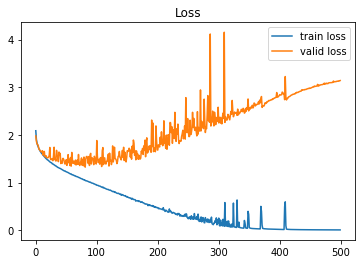

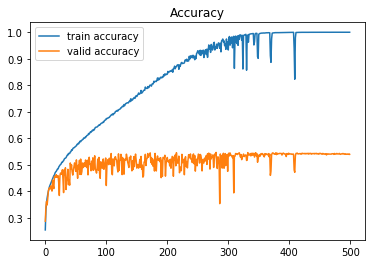

In [0]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()